In [9]:
import pandas as pd

In [16]:
ratings = pd.read_csv('./data/ratings.csv')
musics = pd.read_csv('./data/musics.csv', engine='python',  encoding='utf_8_sig', sep=',', quotechar='"', error_bad_lines=False)

Skipping line 3351: ',' expected after '"'
Skipping line 9085: ',' expected after '"'
Skipping line 9535: ',' expected after '"'
Skipping line 9718: ',' expected after '"'
Skipping line 10911: ',' expected after '"'
Skipping line 11337: ',' expected after '"'
Skipping line 11397: ',' expected after '"'
Skipping line 13869: ',' expected after '"'
Skipping line 14072: ',' expected after '"'
Skipping line 15109: ',' expected after '"'
Skipping line 15193: unexpected end of data


In [11]:
ratings.head()

,music,uid,tokuten
0,155,ahoudori,9
1,377,ahoudori,9
2,572,熊谷,10
3,550,熊谷,10
4,157,熊谷,9


In [12]:
musics.head()

,music_id,music_name
0,7783,琥珀の祈り
1,3727,Déjà vu
2,33,バトルできゅんっ！なキングダム☆
3,32,Jumping Star
4,34,キラキラ☆恋ゴコロ


In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79609 entries, 0 to 79608
Data columns (total 3 columns):
music      79609 non-null int64
uid        79609 non-null object
tokuten    79609 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.8+ MB


In [14]:
musics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15181 entries, 0 to 15180
Data columns (total 2 columns):
music_id      15181 non-null int64
music_name    15180 non-null object
dtypes: int64(1), object(1)
memory usage: 237.3+ KB


<AxesSubplot:>

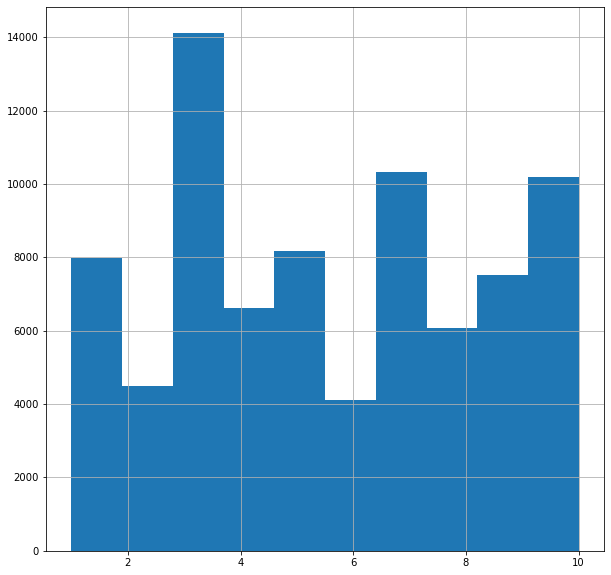

In [18]:
ratings['score'].hist(bins=10, figsize=(10,10))

Skipping line 3351: ',' expected after '"'
Skipping line 9085: ',' expected after '"'
Skipping line 9535: ',' expected after '"'
Skipping line 9718: ',' expected after '"'
Skipping line 10911: ',' expected after '"'
Skipping line 11337: ',' expected after '"'
Skipping line 11397: ',' expected after '"'
Skipping line 13869: ',' expected after '"'
Skipping line 14072: ',' expected after '"'
Skipping line 15109: ',' expected after '"'
Skipping line 15193: unexpected end of data


,id,name
0,7783,琥珀の祈り
1,3727,Déjà vu
2,33,バトルできゅんっ！なキングダム☆
3,32,Jumping Star
4,34,キラキラ☆恋ゴコロ


In [19]:
# music_idをキーにしてマージ
merged_df = ratings.merge(musics, left_on='music', right_on='music_id', suffixes=['_user', ''])
merged_df.head()

,music,uid,score,music_id,music_name
0,155,ahoudori,9,155,Glorious Days
1,155,aiko1122,6,155,Glorious Days
2,155,ihave,3,155,Glorious Days
3,155,selfeena,8,155,Glorious Days
4,155,twinklestar_act2,5,155,Glorious Days


In [22]:
# 学習に用いる特徴量を抽出
merged_df = merged_df[['uid', 'music_name', 'score']]
# 重複を削除
merged_df = merged_df.drop_duplicates(['uid', 'music_name'])

merged_df.head()

,uid,music_name,score
0,ahoudori,Glorious Days,9
1,aiko1122,Glorious Days,6
2,ihave,Glorious Days,3
3,selfeena,Glorious Days,8
4,twinklestar_act2,Glorious Days,5


In [23]:
# import Machine-Learning library
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [25]:
# ゲーソンを軸にグルーピング
musics_pivot = merged_df.pivot(index='music_name', columns='uid', values='score').fillna(0)
musics_pivot_sparse = csr_matrix(musics_pivot.values)

musics_pivot.head()

uid,00999,01040228,0321445,0495ex,050325,0504,0824064,09848754,0987643,0rdinary,...,霧雨,響季,騎羅大和,魔中年,鳳,黄昏の統括者,（光）エロゲの罪,（＾ｐ＾）,ｃ1095161,ｋｔｍ715
music_name,,,,,,,,,,,,,,,,,,,,,
NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(I will) be with you,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(^3^)chu☆でれ☆らぷそでぃ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(a)SLOW STAR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
*bloom*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# k=9, 最適化アルゴリズム=, 距離=コサイン類似度でknnインスタンスを作成
knn = NearestNeighbors(n_neighbors=9, algorithm='brute', metric='cosine')
# モデルを訓練
model_knn = knn.fit(musics_pivot_sparse)

In [35]:
# 引数に入れるゲーソンから類似する順に10個のゲーソンを返す
def music_recommend(music):
    distance, indice = model_knn.kneighbors(musics_pivot.iloc[musics_pivot.index == music].values.reshape(1,-1),n_neighbors=11)
    for i in range(0, len(distance.flatten())):
        if  i == 0:
            print('Recommendations if you like the music {0}:\n'.format(musics_pivot[musics_pivot.index == music].index[0]))
        else:
            print('{0}: {1} with distance: {2}'.format(i,musics_pivot.index[indice.flatten()[i]],distance.flatten()[i]))

In [75]:
music_recommend('Floating up')

Recommendations if you like the music Floating up:

1: find a piece with distance: 0.44782582666862913
2: bumpy-Jumpy! with distance: 0.5709953933831731
3: Girl meets Love with distance: 0.593089016450771
4: Rolling Star☆彡 with distance: 0.6198746149032806
5: INITIATIVE with distance: 0.6321882314646129
6: 原罪のレクイエム with distance: 0.6371356203378049
7: ANGELIC DESTINY with distance: 0.6423171636862111
8: sword of virgin with distance: 0.6442334052422778
9: Presto with distance: 0.6444799113736535
10: Scarlet with distance: 0.6451025055674662
